In [1]:
import os
import sys

import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import colors
from hydra import initialize, compose
import pickle
from glob import glob
from pprint import pprint

# set paths to various directories based on the machine this code is being executed on
with initialize(version_base=None, config_path='../../config'):
    config = compose(config_name='config.yaml')  # overrides=['machine=uzay']

array_dir, data_dir, figure_dir, pickle_dir, repo_dir  = config.machine.array_dir, config.machine.data_dir, config.machine.figure_dir, config.machine.pickle_dir, config.machine.repo_dir

# enable use of local modules
if repo_dir not in sys.path:
    sys.path.append(repo_dir)

# set matplotlib style
plt.style.use(f'{repo_dir}/mejiro/mplstyle/science.mplstyle')

from mejiro.lenses.test import SampleStrongLens
from mejiro.plots import diagnostic_plot, plot, plot_util, overplot
from mejiro.analysis import stats
from mejiro.utils import util
from mejiro.helpers import pyhalo

Import/create images to get power spectra of

In [3]:
input_dir = os.path.join(config.machine.data_dir, 'output', 'power_spectrum_galsim')

no_cut_model = np.load(os.path.join(input_dir, 'no_cut_model'))
cut_7_model = np.load(os.path.join(input_dir, 'cut_7_model'))
cut_8_model = np.load(os.path.join(input_dir, 'cut_8_model'))

dif_no_8 = no_cut_model - cut_8_model
dif_no_7 = no_cut_model - cut_7_model
dif_7_8 = cut_7_model - cut_8_model

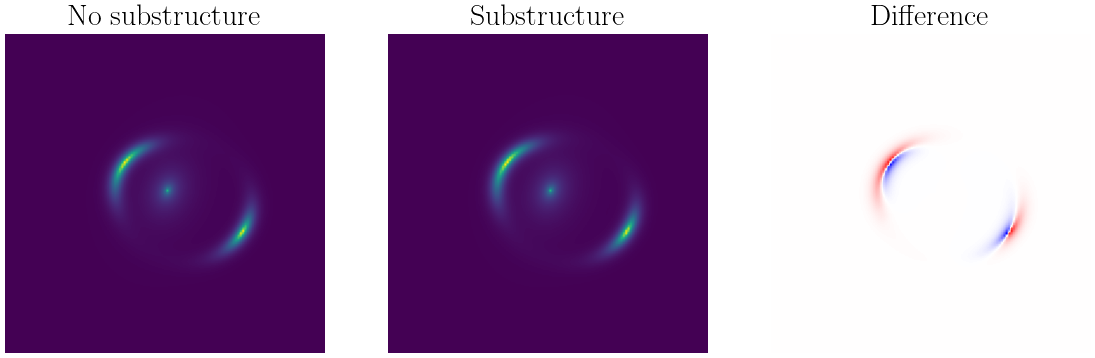

In [7]:
f, ax = plt.subplots(1, 3, figsize=(14, 6))
ax[0].imshow(no_cut_model)
ax[0].set_title('No cut')
ax[1].imshow(cut_7_model)
ax[1].set_title('Cut at 7')
ax[2].imshow(cut_8_model)
ax[2].set_title('Cut at 8')
for i in ax: i.set_axis_off()
plt.show()

In [ ]:
f, ax = plt.subplots(1, 3, figsize=(14, 6))
ax[2].imshow(dif_no_8, cmap='bwr', **plot_util.set_v([dif_no_8]))
ax[2].set_title('dif_no_8')
ax[2].imshow(dif_no_7, cmap='bwr', **plot_util.set_v([dif_no_7]))
ax[2].set_title('dif_no_7')
ax[2].imshow(dif_7_8, cmap='bwr', **plot_util.set_v([dif_7_8]))
ax[2].set_title('dif_7_8')
for i in ax: i.set_axis_off()
plt.show()

Set the x-axis

In [4]:
k_min = (2 * np.pi) / 4.95
k_max = (2 * np.pi) / 0.11

k_array = np.linspace(k_min, k_max, 45, endpoint=True)

Now work on the y-axis